# Mutation Down Analysis

In this Jupyter notebook, the individual seeds for each test (e.g. genome size, number of non-coding bases, etc.) is graphed out, along with the control condition for comparison.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import gc
from scipy import stats
from functools import reduce
from MyFunctions import read_fitness, read_bp, read_genes, read_robustness, perc_diff, name, mean_format, rank_sum_format, cond_color, seed_color, my_y_label

# Laptop
#INPUT_ROOT_DIR = "C://Users//davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

# Desktop
INPUT_ROOT_DIR = "D://Dropbox_New//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

OUTPUT_ROOT_DIR = INPUT_ROOT_DIR + "analysis//mut_down_analysis//"
WINDOW_SIZE = 10000
GENOME_WINDOW_SIZE = 5000

print ("Setting up environment...")
# Make sure that the output directories exist and create them if not
if not os.path.exists(OUTPUT_ROOT_DIR):
    os.makedirs(OUTPUT_ROOT_DIR)
    
# stat_fitness_global
if not os.path.exists(OUTPUT_ROOT_DIR + "fitness_global//"):
    os.makedirs(OUTPUT_ROOT_DIR + "fitness_global//")
    
# stat_genes_global
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_global//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_global//")
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_global//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_global//")
    
# stat_genes_best (for non-coding)
if not os.path.exists(OUTPUT_ROOT_DIR + "non-coding//"):
    os.makedirs(OUTPUT_ROOT_DIR + "non-coding//")

if not os.path.exists(OUTPUT_ROOT_DIR + "robustness//"):
    os.makedirs(OUTPUT_ROOT_DIR + "robustness//")
    
if not os.path.exists(OUTPUT_ROOT_DIR + "evolvability//"):
    os.makedirs(OUTPUT_ROOT_DIR + "evolvability//")

# We need to be able to write out some statistics. Create an output file for this purpose.
LINE = "============================================="

plt.rc('legend',fontsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

print("done.")

Setting up environment...
done.


## Read in the data for the mutation down condition

In [2]:
print("Reading in mut_down data...")

# stat_fitness_glob
df_seed01_mutation_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//mut_down//stats//stat_fitness_glob.out")
df_seed02_mutation_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//mut_down//stats//stat_fitness_glob.out")
df_seed03_mutation_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//mut_down//stats//stat_fitness_glob.out")
df_seed04_mutation_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//mut_down//stats//stat_fitness_glob.out")
df_seed05_mutation_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//mut_down//stats//stat_fitness_glob.out")

stat_fitness_glob_mut_down = [df_seed01_mutation_down_fitness_global, df_seed02_mutation_down_fitness_global, df_seed03_mutation_down_fitness_global, df_seed04_mutation_down_fitness_global, df_seed05_mutation_down_fitness_global]

# stat_genes_global 
df_seed01_mutation_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//mut_down//stats//stat_genes_glob.out")
df_seed02_mutation_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//mut_down//stats//stat_genes_glob.out")
df_seed03_mutation_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//mut_down//stats//stat_genes_glob.out")
df_seed04_mutation_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//mut_down//stats//stat_genes_glob.out")
df_seed05_mutation_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//mut_down//stats//stat_genes_glob.out")

stat_genes_glob_mut_down = [df_seed01_mutation_down_genes_global, df_seed02_mutation_down_genes_global, df_seed03_mutation_down_genes_global, df_seed04_mutation_down_genes_global, df_seed05_mutation_down_genes_global]

# stat_bp_best (for percent non-coding)
df_seed01_mutation_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//mut_down//stats//stat_bp_best.out")
df_seed02_mutation_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//mut_down//stats//stat_bp_best.out")
df_seed03_mutation_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//mut_down//stats//stat_bp_best.out")
df_seed04_mutation_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//mut_down//stats//stat_bp_best.out")
df_seed05_mutation_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//mut_down//stats//stat_bp_best.out")

stat_bp_best_mut_down = [df_seed01_mutation_down_bp_best, df_seed02_mutation_down_bp_best, df_seed03_mutation_down_bp_best, df_seed04_mutation_down_bp_best, df_seed05_mutation_down_bp_best]

# stat_fitness_best (for percent non-coding)
df_seed01_mutation_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//mut_down//stats//stat_fitness_best.out")
df_seed02_mutation_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//mut_down//stats//stat_fitness_best.out")
df_seed03_mutation_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//mut_down//stats//stat_fitness_best.out")
df_seed04_mutation_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//mut_down//stats//stat_fitness_best.out")
df_seed05_mutation_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//mut_down//stats//stat_fitness_best.out")

stat_fitness_best_mut_down = [df_seed01_mutation_down_fitness_best, df_seed02_mutation_down_fitness_best, df_seed03_mutation_down_fitness_best, df_seed04_mutation_down_fitness_best, df_seed05_mutation_down_fitness_best]

print("done.")

Reading in mut_down data...
done.


## Read in the data for the control condition

In [3]:
print("Reading in control data...")

# stat_fitness_glob
df_seed01_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//control//stats//stat_fitness_glob.out")
df_seed02_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//control//stats//stat_fitness_glob.out")
df_seed03_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//control//stats//stat_fitness_glob.out")
df_seed04_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//control//stats//stat_fitness_glob.out")
df_seed05_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//control//stats//stat_fitness_glob.out")

stat_fitness_glob_control = [df_seed01_control_fitness_global, df_seed02_control_fitness_global, df_seed03_control_fitness_global, df_seed04_control_fitness_global, df_seed05_control_fitness_global]

# stat_genes_global 
df_seed01_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//control//stats//stat_genes_glob.out")
df_seed02_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//control//stats//stat_genes_glob.out")
df_seed03_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//control//stats//stat_genes_glob.out")
df_seed04_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//control//stats//stat_genes_glob.out")
df_seed05_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//control//stats//stat_genes_glob.out")

stat_genes_glob_control = [df_seed01_control_genes_global, df_seed02_control_genes_global, df_seed03_control_genes_global, df_seed04_control_genes_global, df_seed05_control_genes_global]

# stat_bp_best (for percent non-coding)
df_seed01_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//control//stats//stat_bp_best.out")
df_seed02_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//control//stats//stat_bp_best.out")
df_seed03_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//control//stats//stat_bp_best.out")
df_seed04_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//control//stats//stat_bp_best.out")
df_seed05_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//control//stats//stat_bp_best.out")

stat_bp_best_control = [df_seed01_control_bp_best, df_seed02_control_bp_best, df_seed03_control_bp_best, df_seed04_control_bp_best, df_seed05_control_bp_best]

# stat_fitness_best (for percent non-coding)
df_seed01_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//control//stats//stat_fitness_best.out")
df_seed02_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//control//stats//stat_fitness_best.out")
df_seed03_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//control//stats//stat_fitness_best.out")
df_seed04_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//control//stats//stat_fitness_best.out")
df_seed05_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//control//stats//stat_fitness_best.out")

stat_fitness_best_control = [df_seed01_control_fitness_best, df_seed02_control_fitness_best, df_seed03_control_fitness_best, df_seed04_control_fitness_best, df_seed05_control_fitness_best]

print("done.")

Reading in control data...
done.


# Graph results of stat_fitness_glob

The general idea is:

- For each column (e.g. genome size, fitness, etc.)
   - For each seed of the mutation down condition
      - Plot the individual seed
   - Plot the mean of all seeds for that aspect
   - Plot the control condition's mean for that aspect

In [4]:
# Allows one to just graph the last 50k generations, etc.
START_GEN = 1
STOP_GEN = 500000

invalid_headers = ['generation', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amt_compound_present', 'pop_size']

# For each column header that isn't invalid (e.g. genome size, metabolic error, etc.)
num_headers = len(df_seed01_mutation_down_fitness_global.columns) - len(invalid_headers)
for col_counter, col_header in enumerate(df_seed01_mutation_down_fitness_global.columns, -1):
        
    if col_header in invalid_headers:
        continue
    else:
        print(col_counter, '/',num_headers, ' - ', col_header)
        
        # Generate the generational indices for the two DataFrames(mut_down and control) that will
        # store the mean values for each header
        df_mut_down_mean = pd.DataFrame(df_seed01_mutation_down_fitness_global['generation'].copy())
        df_control_mean = pd.DataFrame(df_seed01_control_fitness_global['generation'].copy())
                
        # Create a new figure for the current column
        fig = plt.figure(figsize=(30,20))
        ax = fig.add_subplot(111)
        fig.suptitle('Mutation Down - ' + name(col_header), x=0.5, y=0.92, fontsize=32)
        ax.set_xlabel("generation", fontsize=20)
        ax.set_ylabel(my_y_label(col_header),fontsize=20)
        
        # For each seed of the mut_down condition
        for seed_counter, seed in enumerate(stat_fitness_glob_mut_down):
                        
            # The name of the current seed
            seed_str = 'seed0'+str(seed_counter+1)
            
            # Smooth the seed's data with a rolling window
            df_mut_down_mean[seed_str] = seed[col_header].rolling(WINDOW_SIZE).mean()
            
            # Add the current seed to the figure
            df_mut_down_mean.iloc[START_GEN:STOP_GEN].plot(x='generation', y=seed_str, label=seed_str, color=seed_color(seed_str),  ax=ax)
        
        # For the control condition, we don't want to plot all of the individual seeds but just
        # the mean, so we need to find that mean.
        # For each seed of the control condition:
        for seed_counter, seed in enumerate(stat_fitness_glob_control):
              
            # Add the seed to a temporary DataFrame to make calculating the mean easier
            seed_str = 'seed0'+str(seed_counter+1)
            df_control_mean[seed_str] = seed[col_header].rolling(WINDOW_SIZE).mean()
                        
        # Calculate the mean for the mut_down condition and plot it to the figure
        df_mut_down_mean['avg'] = df_mut_down_mean.iloc[:,1:].mean(axis=1).rolling(WINDOW_SIZE).mean() # iloc[:,1:] to skip first column ('generation')
        df_mut_down_mean.iloc[START_GEN:STOP_GEN].plot(x='generation', y='avg', label='mut down mean '+ name(col_header), linewidth=3.0, color='blue', linestyle='dashed', ax=ax)
                
        #  Calculate the mean of the control condition and plot it to the figure
        df_control_mean['avg'] = df_control_mean.iloc[:,1:].mean(axis=1).rolling(WINDOW_SIZE).mean() # iloc[:,1:] to skip first column ('generation')
        df_control_mean.iloc[START_GEN:STOP_GEN].plot(x='generation', y='avg', label='control mean ' + name(col_header), linewidth=3.0, color='black', linestyle='dashed', ax=ax)
        
        fig.savefig(OUTPUT_ROOT_DIR+ 'fitness_global/mut_down_' + col_header+'_b'+str(START_GEN)+'-e'+str(STOP_GEN)+'.png', bbox_inches='tight', pad_inches=0.25)
        fig.clear()
        plt.close(fig)
        
print("Done!")
 

1 / 5  -  fitness
2 / 5  -  genome_size
3 / 5  -  metabolic_error
4 / 5  -  parents_metabolic_error
5 / 5  -  metabolic_fitness
Done!


## Clean up the DataFrames

In [5]:
print("Cleaning up...")
for seed in stat_fitness_glob_mut_down:
    del seed
for seed in stat_fitness_glob_control:
    del seed
    
del stat_fitness_glob_mut_down, stat_fitness_glob_control
del df_mut_down_mean, df_control_mean
gc.collect()
print("Done.")

Cleaning up...
Done.


## Graph out stat_genes_global

1 / 8  -  num_coding_RNAs
2 / 8  -  num_non-coding_RNAs
3 / 8  -  avg_size_of_coding_RNAs
4 / 8  -  avg_size_of_non-coding_RNAs
5 / 8  -  num_functional_genes


NameError: name 'df_seed01_mut_down_genes_global' is not defined

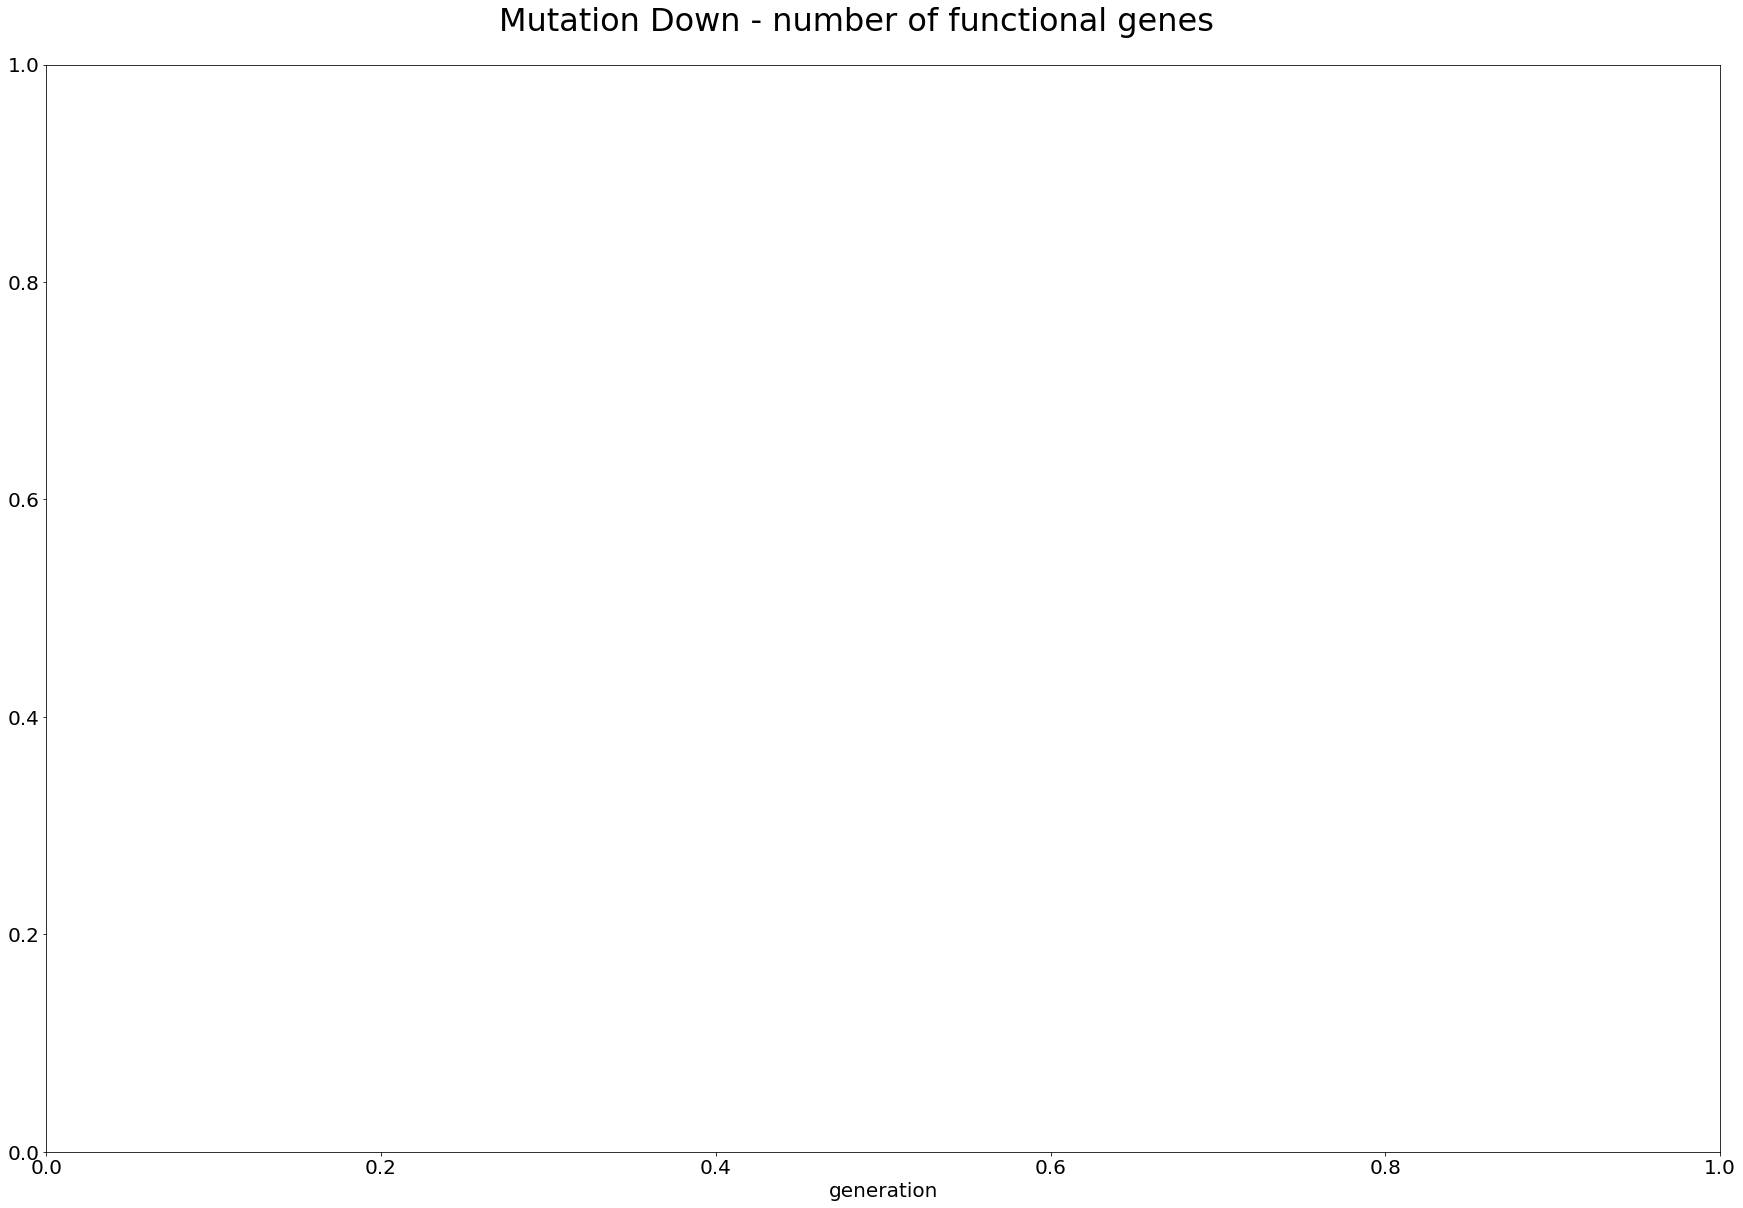

In [4]:
# Allows one to just graph the last 50k generations, etc.
START_GEN = 1
STOP_GEN = 500000

invalid_headers = ['generation']

# For each column header that isn't invalid (e.g. genome size, metabolic error, etc.)
num_headers = len(df_seed01_mutation_down_genes_global.columns) - len(invalid_headers)
for col_counter, col_header in enumerate(df_seed01_mutation_down_genes_global.columns):
        
    if col_header in invalid_headers:
        continue
    else:
        print(col_counter, '/',num_headers, ' - ', col_header)
        
        # Generate the generational indices for the two DataFrames(mut_down and control) that will
        # store the mean values for each header
        df_mut_down_mean = pd.DataFrame(df_seed01_mutation_down_genes_global['generation'].copy())
        df_control_mean = pd.DataFrame(df_seed01_control_genes_global['generation'].copy())
                
        # Create a new figure for the current column
        fig = plt.figure(figsize=(30,20))
        ax = fig.add_subplot(111)
        fig.suptitle('Mutation Down - ' + name(col_header), x=0.5, y=0.92, fontsize=32)
        ax.set_xlabel("generation", fontsize=20)
        ax.set_ylabel(my_y_label(col_header),fontsize=20)
        
        # Print out the gene density!
        if col_header =='num_functional_genes':
            
            # Create a new DataFrame for the mut_down and control
            df_gene_density_mut_down = pd.DataFrame(df_seed01_mut_down_genes_global['generation'].copy())
            df_gene_density_control = pd.DataFrame(df_seed01_control_genes_global['generation'].copy())
                
            # Find the number of functional genes for the mut_down condition    
            for seed_counter, seed in enumerate(stat_genes_glob_mut_down):
                seed_str = 'seed0' + str(seed_counter+1)
                df_gene_density_mut_down[seed_str] = seed['num_functional_genes']
                
            # Find the total genome size for the mut_down condition
            for seed_counter, seed in enumerate(stat_fitness_glob_mut_down):
                seed_str = 'seed0' + str(seed_counter+1)
                df_gene_density_mut_down[seed_str] = df_gene_density_mut_down[seed_str] / seed['genome_size']
                df_gene_density_mut_down[seed_str] = df_gene_density_mut_down[seed_str].rolling(WINDOW_SIZE).mean()
            
            # Find the number of functional genes for the control condition
            for seed_counter, seed in enumerate(stat_genes_glob_control):
                seed_str = 'seed0' + str(seed_counter+1)
                df_gene_density_control[seed_str] = seed['num_functional_genes']
            
            # Find the total genome size for the mut_down condition
            for seed_counter, seed in enumerate(stat_fitness_glob_control):
                seed_str = 'seed0' + str(seed_counter+1)
                df_gene_density_control[seed_str] = df_gene_density_control[seed_str] / seed['genome_size']
                df_gene_density_control[seed_str] = df_gene_density_control[seed_str].rolling(WINDOW_SIZE).mean()
            
            # Create a figure for the gene density
            fig_density = plt.figure(figsize=(30,20))
            ax_density = fig_density.add_subplot(111)
            fig_density.suptitle("Mutation Down - gene density", x=0.5, y=0.92, fontsize=32)
            ax_density.set_xlabel("generation", fontsize=20)
            
            # Plot the results of the mut_down calculations
            for c_header in df_gene_density_mut_down.columns:
                if c_header == 'generation':
                    continue
                else:
                    df_gene_density_mut_down[df_gene_density_mut_down['generation'].between(START_GEN, STOP_GEN)].plot(x='generation', y=c_header, label=c_header, color=seed_color(c_header), alpha=0.75, ax=ax_density)
            
            # Calculate and plot the mut_down average
            df_gene_density_mut_down['avg'] = df_gene_density_mut_down.iloc[:,1:].mean(axis=1).rolling(WINDOW_SIZE).mean()
            df_gene_density_mut_down[df_gene_density_mut_down['generation'].between(START_GEN, STOP_GEN)].plot(x='generation', y='avg', label='mutation down mean gene density', color='blue', linestyle='dashed', linewidth=3.0, ax=ax_density)
            
            # Calculate and plot the control average
            df_gene_density_control['avg'] = df_gene_density_control.iloc[:,1:].mean(axis=1).rolling(WINDOW_SIZE).mean()
            df_gene_density_control[df_gene_density_control['generation'].between(START_GEN, STOP_GEN)].plot(x='generation', y='avg', label='control mean gene density', color='black', linestyle='dashed', linewidth=3.0, ax=ax_density)
            
            fig_density.savefig(OUTPUT_ROOT_DIR + 'genes_global/mut_down_gene_density_b' + str(START_GEN) +'-e'+ str(STOP_GEN) +'.png', bbox_inches='tight', pad_inches=0.25)    
            fig_density.clear()
            plt.close(fig_density)
        
        # For each seed of the mut_down condition
        for seed_counter, seed in enumerate(stat_genes_glob_mut_down):
                        
            # The name of the current seed
            seed_str = 'seed0'+str(seed_counter+1)
            
            # Smooth the seed's data with a rolling window
            df_mut_down_mean[seed_str] = seed[col_header].rolling(WINDOW_SIZE).mean()
            
            # Add the current seed to the figure
            df_mut_down_mean.iloc[START_GEN:STOP_GEN].plot(x='generation', y=seed_str, label=seed_str, color=seed_color(seed_str),  ax=ax)
        
        # For the control condition, we don't want to plot all of the individual seeds but just
        # the mean, so we need to find that mean.
        # For each seed of the control condition:
        for seed_counter, seed in enumerate(stat_genes_glob_control):
              
            # Add the seed to a temporary DataFrame to make calculating the mean easier
            seed_str = 'seed0'+str(seed_counter+1)
            df_control_mean[seed_str] = seed[col_header].rolling(WINDOW_SIZE).mean()
                        
        # Calculate the mean for the mut_down condition and plot it to the figure
        df_mut_down_mean['avg'] = df_mut_down_mean.iloc[:,1:].mean(axis=1).rolling(WINDOW_SIZE).mean() # iloc[:,1:] to skip first column ('generation')
        df_mut_down_mean.iloc[START_GEN:STOP_GEN].plot(x='generation', y='avg', label='mut down mean '+ name(col_header), linewidth=3.0, color='blue', linestyle='dashed', ax=ax)
                
        #  Calculate the mean of the control condition and plot it to the figure
        df_control_mean['avg'] = df_control_mean.iloc[:,1:].mean(axis=1).rolling(WINDOW_SIZE).mean() # iloc[:,1:] to skip first column ('generation')
        df_control_mean.iloc[START_GEN:STOP_GEN].plot(x='generation', y='avg', label='control mean ' + name(col_header), linewidth=3.0, color='black', linestyle='dashed', ax=ax)
        
        fig.savefig(OUTPUT_ROOT_DIR+ 'genes_global/mut_down_' + col_header+'_b'+str(START_GEN)+'-e'+str(STOP_GEN)+'.png', bbox_inches='tight', pad_inches=0.25)
        fig.clear()
        plt.close(fig)
        
print("Done!")
 

## Clean up the DataFrames

In [7]:
print("Cleaning up...")
for seed in stat_genes_glob_mut_down:
    del seed
for seed in stat_genes_glob_control:
    del seed
    
del stat_genes_glob_mut_down, stat_genes_glob_control
del df_mut_down_mean, df_control_mean
gc.collect()
print("Done.")

Cleaning up...
Done.


## Graph out the percent non-coding

This uses stat_bp_best and stat_fitness_best. We need the number of non-coding bp from stat_bp_best and the genome size from stat_fitness_best. 

In [6]:
print("Graphing percent non-coding...")

# Allows one to just graph the last 50k generations, etc.
START_GEN = 1
STOP_GEN = 500000

# Create a new figure to graph the results
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)
fig.suptitle('Mutation Down - Percent Non-Coding', x=0.5, y=0.92, fontsize=32)
ax.set_xlabel("generation", fontsize=20)



df_num_noncoding_mut_down = pd.DataFrame(df_seed01_mutation_down_bp_best['generation'].copy())
df_num_noncoding_control = pd.DataFrame(df_seed01_control_bp_best['generation'].copy())
for seed_counter, seed in enumerate(stat_bp_best_mut_down):
    seed_str = 'seed0' + str(seed_counter+1)
    df_num_noncoding_mut_down[seed_str] = seed['num_bp_not_included_in_any_coding_RNA']
    
df_mut_down_smoothed = pd.DataFrame(df_num_noncoding_mut_down['generation'].copy())
# Now for each seed's number of BP not in any coding RNA, divide this by the total genome size
for seed_counter, seed in enumerate(stat_fitness_best_mut_down):
    seed_str = 'seed0' + str(seed_counter+1)
    
    # Calculate the percent non-coding
    df_num_noncoding_mut_down[seed_str] = 100*df_num_noncoding_mut_down[seed_str] / seed['genome_size']
    
    # Smooth and plot the result
    df_mut_down_smoothed[seed_str] = df_num_noncoding_mut_down[seed_str].rolling(WINDOW_SIZE).mean()
    df_mut_down_smoothed.iloc[START_GEN:STOP_GEN].plot(x='generation', y=seed_str, alpha=0.8, label=seed_str, color=seed_color(seed_str), ax=ax)
     
# Retrieve the data for each seed
for seed_counter, seed in enumerate(stat_bp_best_control):
    seed_str = 'seed0' + str(seed_counter+1)
    df_num_noncoding_control[seed_str] = seed['num_bp_not_included_in_any_coding_RNA']


for seed_counter, seed in enumerate(stat_fitness_best_control):
    seed_str = 'seed0' + str(seed_counter+1)
    df_num_noncoding_control[seed_str] = 100*df_num_noncoding_control[seed_str] / seed['genome_size']


# Calculate the control and mut_down average across all seeds
df_num_noncoding_mut_down['avg'] = df_num_noncoding_mut_down.iloc[:,1:].mean(axis=1).rolling(WINDOW_SIZE).mean()
df_num_noncoding_control['avg'] = df_num_noncoding_control.iloc[:,1:].mean(axis=1).rolling(WINDOW_SIZE).mean()

# Plot the control and mut_down average
df_num_noncoding_mut_down.iloc[START_GEN:STOP_GEN].plot(x='generation', y='avg', label='mut down mean percent non-coding', color='blue', linestyle='dashed', linewidth=3.0, ax=ax)
df_num_noncoding_control.iloc[START_GEN:STOP_GEN].plot(x='generation', y='avg', label='control mean percent non-coding', color='black', linestyle='dashed', linewidth=3.0, ax=ax)


#Save and close the figure
fig.savefig(OUTPUT_ROOT_DIR+"non-coding/mut_down_percent_non-coding_b"+str(START_GEN)+"-e"+str(STOP_GEN)+".png", bbox_inches='tight', pad_inches=0.25)
fig.clear()
plt.close(fig)

print("done.")
 
    

Graphing percent non-coding...
done.


## Clean up the DataFrames

In [7]:
print("Cleaning up...")
for df in stat_fitness_best_mut_down:
    del df

del stat_fitness_best_mut_down

for df in stat_bp_best_control:
    del df

del stat_bp_best_control
del df_num_noncoding_mut_down, df_num_noncoding_control
gc.collect()

print("done.")



Cleaning up...
done.


# Evolvability and Robustness

## Read in the data

In [10]:
print("Reading in data...")
# Mutation Down
df_seed01_mutation_down_robustness = read_robustness(INPUT_ROOT_DIR + "seed01//mut_down//seed01_mutation_down_ancestor_robustness.out")
df_seed02_mutation_down_robustness = read_robustness(INPUT_ROOT_DIR + "seed02//mut_down//seed02_mutation_down_ancestor_robustness.out")
df_seed03_mutation_down_robustness = read_robustness(INPUT_ROOT_DIR + "seed03//mut_down//seed03_mutation_down_ancestor_robustness.out")
df_seed04_mutation_down_robustness = read_robustness(INPUT_ROOT_DIR + "seed04//mut_down//seed04_mutation_down_ancestor_robustness.out")
df_seed05_mutation_down_robustness = read_robustness(INPUT_ROOT_DIR + "seed05//mut_down//seed05_mutation_down_ancestor_robustness.out")

list_mut_down_robustness = [df_seed01_mutation_down_robustness, df_seed02_mutation_down_robustness, df_seed03_mutation_down_robustness, df_seed04_mutation_down_robustness, df_seed05_mutation_down_robustness]

# Control
df_seed01_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed01//control//seed01_control_ancestor_robustness.out")
df_seed02_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed02//control//seed02_control_ancestor_robustness.out")
df_seed03_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed03//control//seed03_control_ancestor_robustness.out")
df_seed04_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed04//control//seed04_control_ancestor_robustness.out")
df_seed05_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed05//control//seed05_control_ancestor_robustness.out")

list_control_robustness = [df_seed01_control_robustness, df_seed02_control_robustness, df_seed03_control_robustness, df_seed04_control_robustness, df_seed05_control_robustness]

print("done.")

Reading in data...
done.


## Graph the robustness

Robustness in Aevol is the percentage of neutral mutants.



In [11]:
print("Graphing robustness...")
# Allows one to just graph the last 50k generations, etc.
START_GEN = 1
STOP_GEN = 500000


invalid_headers = ['generation']
num_headers = len(df_seed01_control_robustness.columns) - len(invalid_headers)
for col_counter, col_header in enumerate(df_seed01_control_robustness.columns):
    if col_header in invalid_headers:
        continue
    else:
        print(col_counter, '/',num_headers, ' - ', col_header)
        
        # Create new DataFrames for the mut_down and control conditions
        df_mut_down_mean = pd.DataFrame(df_seed01_mutation_down_robustness['generation'].copy())
        df_control_mean = pd.DataFrame(df_seed01_control_robustness['generation'].copy())
        df_mut_down_smoothed = pd.DataFrame(df_seed01_mutation_down_robustness['generation'].copy())
        
        # Create a new figure for the current column
        fig = plt.figure(figsize=(30,20))
        ax = fig.add_subplot(111)
        fig.suptitle('Mutation Down - ' + name(col_header), x=0.5, y=0.92, fontsize=32)
        ax.set_xlabel("generation", fontsize=20)
        ax.set_ylabel(my_y_label(col_header),fontsize=20)
            
               
        # For each seed of the mut_down condition
        for seed_counter, seed in enumerate(list_mut_down_robustness):
            
            ROBUSTNESS_WINDOW = int(len(seed.index)/20)
                        
            # The name of the current seed
            seed_str = 'seed0'+str(seed_counter+1)
            
            # Smooth the seed's data with a rolling window
            df_mut_down_mean[seed_str] = seed[col_header]#.rolling(WINDOW_SIZE).mean()
            df_mut_down_smoothed[seed_str] = df_mut_down_mean[seed_str].rolling(ROBUSTNESS_WINDOW).mean()
            
            #print(df_mut_down_smoothed.tail())
                        
            # Add the current seed to the figure
            df_mut_down_smoothed[df_mut_down_smoothed['generation'].between(START_GEN,STOP_GEN)].plot(x='generation', y=seed_str, label=seed_str, color=seed_color(seed_str),  ax=ax)
            
        
        # For the control condition, we don't want to plot all of the individual seeds but just
        # the mean, so we need to find that mean.
        # For each seed of the control condition:
        for seed_counter, seed in enumerate(list_control_robustness):
            ROBUSTNESS_WINDOW = int(len(seed.index)/20)  
            # Add the seed to a temporary DataFrame to make calculating the mean easier
            seed_str = 'seed0'+str(seed_counter+1)
            df_control_mean[seed_str] = seed[col_header]#.rolling(WINDOW_SIZE).mean()
                        
        # Calculate the mean for the mut_down condition and plot it to the figure
        df_mut_down_mean['avg'] = df_mut_down_mean.iloc[:,1:].mean(axis=1).rolling(ROBUSTNESS_WINDOW).mean() # iloc[:,1:] to skip first column ('generation')
        df_mut_down_mean[df_mut_down_mean['generation'].between(START_GEN, STOP_GEN)].plot(x='generation', y='avg', label='mut down mean '+ name(col_header), linewidth=3.0, color='blue', linestyle='dashed', ax=ax)
                
        #  Calculate the mean of the control condition and plot it to the figure
        df_control_mean['avg'] = df_control_mean.iloc[:,1:].mean(axis=1).rolling(ROBUSTNESS_WINDOW).mean() # iloc[:,1:] to skip first column ('generation')
        df_control_mean[df_control_mean['generation'].between(START_GEN, STOP_GEN)].plot(x='generation', y='avg', label='control mean ' + name(col_header), linewidth=3.0, color='black', linestyle='dashed', ax=ax)
        
        fig.savefig(OUTPUT_ROOT_DIR+ 'robustness/mut_down_' + col_header+'_b'+str(START_GEN)+'-e'+str(STOP_GEN)+'.png', bbox_inches='tight', pad_inches=0.25)
        fig.clear()
        plt.close(fig)


print("done.")

Graphing robustness...
1 / 12  -  frac_positive_offspring
2 / 12  -  frac_neutral_offspring
3 / 12  -  frac_neutral_mutants
4 / 12  -  frac_negative_offspring
5 / 12  -  cumul_delta-gap_positive_offspring
6 / 12  -  cumul_delta-gap_negative_offspring
7 / 12  -  delta-gap_best_offspring
8 / 12  -  delta-gap_worst_offspring
9 / 12  -  cumul_delta-fitness_positive_offspring
10 / 12  -  cumul_delta-fitness_negative_offspring
11 / 12  -  delta-fitness_best_offspring
12 / 12  -  delta-fitness_worst_offspring
done.


# Graph evolvability

Evolvability = (the fraction of positive offspring) * (the cumulative delta fitness gap of positive offspring).

In [12]:
print("Graphing evolvability...")
# Allows one to just graph the last 50k generations, etc.
START_GEN = 1
STOP_GEN = 500000
COLUMN_LABELS = ['generation','seed01', 'seed02', 'seed03', 'seed04', 'seed05'] # For resetting column labels after merging

# Create a new figure for the evolvability graph
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)
fig.suptitle('Mutation Down - Evolvability', x=0.5, y=0.92, fontsize=32)
ax.set_xlabel("generation", fontsize=20)
ax.set_ylabel('evolvability',fontsize=20)

# A list of all of the DataFrames holding the evolvability data. 
mut_down_robustness_dfs = [df_seed01_mutation_down_robustness['generation'], df_seed02_mutation_down_robustness['generation'], df_seed03_mutation_down_robustness['generation'], df_seed04_mutation_down_robustness['generation'],df_seed05_mutation_down_robustness['generation']]

# Start a DataFrame for all of the evolvability data for each seed. Begin by copying its generational data.
df_mut_down_evolvability = pd.DataFrame(df_seed01_mutation_down_robustness['generation'])

# For each seed of the mut_down condition, calculate the evolvability.
# Evolvability = frac positive offspring * cumulative delta fitness gap of positive offspring
for seed_counter, seed in enumerate(list_mut_down_robustness):
    
    # Make a temporary DataFrame to store the results of the calculation
    df_tmp =  pd.DataFrame(seed['frac_positive_offspring'] * seed['cumul_delta-fitness_positive_offspring'])
    df_tmp['generation'] = seed['generation'].copy() # Copy in the generational data
    
    # Merge the temp calculations and generational data
    df_mut_down_evolvability = pd.merge(df_mut_down_evolvability, df_tmp, on='generation', how='outer', sort=True)

# Fix the column headers
df_mut_down_evolvability.columns=COLUMN_LABELS

# Now find the mean evolvability of the control condition over time

df_control_evolvability = pd.DataFrame(df_seed01_control_robustness['generation'])

for seed_counter, seed in enumerate(list_control_robustness):
    # Make a temporary DataFrame to store the results of the calculation
    df_tmp =  pd.DataFrame(seed['frac_positive_offspring'] * seed['cumul_delta-fitness_positive_offspring'])
    df_tmp['generation'] = seed['generation'].copy() # Copy in the generational data
    
    # Merge the temp calculations and generational data
    df_control_evolvability = pd.merge(df_control_evolvability, df_tmp, on='generation', how='outer', sort=True)
    
df_control_evolvability.columns=COLUMN_LABELS

df_control_evolvability['avg'] = df_control_evolvability.iloc[:,1:].mean(axis=1)
df_mut_down_evolvability['avg'] = df_mut_down_evolvability.iloc[:,1:].mean(axis=1)
# PLOT THE RESULTS OVER TIME

# For each seed, add it to the plot
for seed in df_mut_down_evolvability.columns:
    if seed=='generation' or seed=='avg':
        continue
    else:
        df_mut_down_evolvability[df_mut_down_evolvability['generation'].between(START_GEN,STOP_GEN)].plot(x='generation', y=seed, label=seed, color=seed_color(seed), alpha=0.50, ax=ax)

# Plot the mean of the control and mut_down conditions
df_control_evolvability[df_control_evolvability['generation'].between(START_GEN,STOP_GEN)].plot(x='generation', y='avg', label='control mean evolvability', color='black', linewidth=2.0, linestyle='dashed', ax=ax)
df_mut_down_evolvability[df_mut_down_evolvability['generation'].between(START_GEN,STOP_GEN)].plot(x='generation', y='avg', label='mutation down mean evolvability', color='blue', linewidth=2.0, linestyle='dashed', ax=ax)

fig.savefig(OUTPUT_ROOT_DIR+ 'evolvability/mut_down_evolvability_b'+str(START_GEN)+'-e'+str(STOP_GEN)+'.png', bbox_inches='tight', pad_inches=0.25)
fig.clear()
plt.close(fig)

# BOXPLOT
# Create a new figure for the boxplot
fig2 = plt.figure(figsize=(30,20))
ax2 = fig2.add_subplot(111)
fig2.suptitle('Mutation Down - Evolvability Boxplot', x=0.5, y=0.92, fontsize=32)
ax2.set_xlabel("generation", fontsize=20)
ax2.set_ylabel('evolvability',fontsize=20)        

seed_labels = ['seed01', 'seed02', 'seed03', 'seed04', 'seed05']        
df_mut_down_evolvability[df_mut_down_evolvability['generation'].between(START_GEN,STOP_GEN)].boxplot(column=seed_labels, ax=ax2)
#df_control_evolvability[df_control_evolvability['generation'].between(START_GEN,STOP_GEN)].boxplot(column=['avg'], ax=ax2)

fig2.savefig(OUTPUT_ROOT_DIR + 'evolvability/mut_down_evolvability_boxplot_b'+str(START_GEN)+'-e'+str(STOP_GEN)+'.png', bbox_inches='tight', pad_inches=0.25)
fig2.clear()
plt.close(fig2)

# HISTOGRAM
# Create a new figure for the histogram
fig3 = plt.figure(figsize=(30,20))
ax3_control = plt.subplot(411)
ax3_mut_down_seed01 = plt.subplot(423, sharex=ax3_control, sharey=ax3_control)
ax3_mut_down_seed02 = plt.subplot(424, sharex=ax3_control, sharey=ax3_control)
ax3_mut_down_seed03 = plt.subplot(425, sharex=ax3_control, sharey=ax3_control)
ax3_mut_down_seed04 = plt.subplot(426, sharex=ax3_control, sharey=ax3_control)
ax3_mut_down_seed05 = plt.subplot(427, sharex=ax3_control, sharey=ax3_control)

hist_axis_list = [ax3_control, ax3_mut_down_seed01, ax3_mut_down_seed02, ax3_mut_down_seed03, ax3_mut_down_seed04, ax3_mut_down_seed05]

# Plot the mut_down condition to the histogram
df_mut_down_evolvability[df_mut_down_evolvability['generation'].between(START_GEN,STOP_GEN)].hist(column=['seed01'], bins=20, alpha=0.50, ax=ax3_mut_down_seed01)
df_mut_down_evolvability[df_mut_down_evolvability['generation'].between(START_GEN,STOP_GEN)].hist(column=['seed02'], bins=20, alpha=0.50, ax=ax3_mut_down_seed02)
df_mut_down_evolvability[df_mut_down_evolvability['generation'].between(START_GEN,STOP_GEN)].hist(column=['seed03'], bins=20, alpha=0.50, ax=ax3_mut_down_seed03)
df_mut_down_evolvability[df_mut_down_evolvability['generation'].between(START_GEN,STOP_GEN)].hist(column=['seed04'], bins=20, alpha=0.50, ax=ax3_mut_down_seed04)
df_mut_down_evolvability[df_mut_down_evolvability['generation'].between(START_GEN,STOP_GEN)].hist(column=['seed05'], bins=20, alpha=0.50, ax=ax3_mut_down_seed05)

# Plot the control condition to the histogram
df_control_evolvability[df_control_evolvability['generation'].between(START_GEN,STOP_GEN)].hist(column=['avg'], bins=20, alpha=0.50, ax=ax3_control)

# Label the figure properly
fig3.suptitle('Mutation Down - Evolvability Histogram', x=0.5, y=0.92, fontsize=32)
# Set general parameters for all plots
for ax in hist_axis_list:
    ax.set_xlabel("Value", fontsize=18)
    ax.set_ylabel("Count", fontsize=18)
    ax.tick_params(axis='both', labelsize=20)

# Set individual labels
ax3_control.set_title("Control", fontsize=25)
ax3_control.xaxis.set_tick_params(labelbottom=True)

ax3_mut_down_seed01.set_title("seed01", fontsize=20)
ax3_mut_down_seed02.set_title("seed02", fontsize=20)
ax3_mut_down_seed03.set_title("seed03", fontsize=20)
ax3_mut_down_seed04.set_title("seed04", fontsize=20)
ax3_mut_down_seed05.set_title("seed05", fontsize=20)

# Save and clear the figure
fig3.savefig(OUTPUT_ROOT_DIR + 'evolvability/mut_down_evolvability_histogram_b'+str(START_GEN) + '-e' + str(STOP_GEN) + '.png', bbox_inches='tight', pad_inches=0.25)
fig3.clear()
plt.close(fig3)
print("done.")

Graphing evolvability...
done.


## Clean up the DataFrames

In [13]:
print("Cleaning up...")
for df in list_control_robustness:
    del df
    
for df in list_mut_down_robustness:
    del df
    
del list_control_robustness, list_mut_down_robustness

del df_mut_down_evolvability, df_control_evolvability

print("done.")

Cleaning up...
done.
